#SkinCancerMNIST_3탄(PyTorch)
a large collection of multi-source dermatoscopic images of pigmented lesions

https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

데이터 불러오기
--

In [ ]:
from google.colab import files
files.upload()

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

In [ ]:
ham_2828R=pd.read_csv('hmnist_28_28_RGB.csv')

In [ ]:
ham_2828R.head()

In [ ]:
from tqdm import tqdm
ham_2828R['image']=0

for i in tqdm(range(0,10015)):
    ham_2828R['image'][i]=np.array(list(ham_2828R.iloc[i, :-2].values), dtype=str)

In [ ]:
for i in range(0,10015):
    ham_2828R['image'][i]=np.array(list(ham_2828R.iloc[i, :-2].values), dtype=int).reshape(28,28,3)

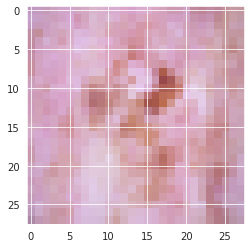

In [26]:
plt.imshow(ham_2828R['image'][0])

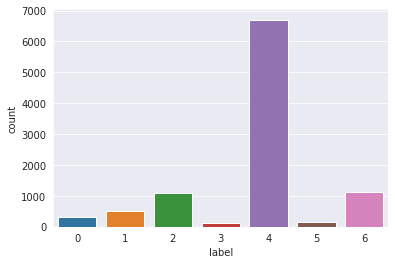

In [31]:
sns.set_style("darkgrid")
sns.countplot(ham_2828R['label'])

- label_mapping={ 4:'nv', 6:'mel', 2:'bkl', 1:'bcc', 0:'akiec', 5:'vasc', 3:'df' }

In [36]:
df_nv=ham_2828R.loc[ham_2828R['label']==4]
df_mel=ham_2828R.loc[ham_2828R['label']==6]
df_bkl=ham_2828R.loc[ham_2828R['label']==2]
df_bcc=ham_2828R.loc[ham_2828R['label']==1]
df_akiec=ham_2828R.loc[ham_2828R['label']==0]
df_vasc=ham_2828R.loc[ham_2828R['label']==5]
df_df=ham_2828R.loc[ham_2828R['label']==3]

In [38]:
df_nv=df_nv.reset_index()
df_mel=df_mel.reset_index()
df_bkl=df_bkl.reset_index()
df_bcc=df_bcc.reset_index()
df_akiec=df_akiec.reset_index()
df_vasc=df_vasc.reset_index()
df_df=df_df.reset_index()

df_nv.drop('index', axis=1, inplace=True)
df_mel.drop('index', axis=1, inplace=True)
df_bkl.drop('index', axis=1, inplace=True)
df_bcc.drop('index', axis=1, inplace=True)
df_akiec.drop('index', axis=1, inplace=True)
df_vasc.drop('index', axis=1, inplace=True)
df_df.drop('index', axis=1, inplace=True)

# 이미지 저장할 경로 생성 및 저장하기

이미지 저장할 경로 생성
--

In [47]:
import shutil

In [53]:
# 디렉토리 잘못 설정했을 때, 지우는 방법
#shutil.rmtree('/content/root_dir')

In [55]:
import os

root_dir = '/content/root_dir'
os.mkdir(root_dir) 

In [54]:
# 디렉토리 잘못 설정했을 때, 지우는 방법
#shutil.rmtree('/content/root_dir')

In [56]:
train_dir = '/content/root_dir/train_dir'
os.mkdir(train_dir) 

In [57]:
test_dir = '/content/root_dir/test_dir'
os.mkdir(test_dir) 

In [58]:
label_mapping={ 4:'nv', 6:'mel', 2:'bkl', 1:'bcc', 0:'akiec', 5:'vasc', 3:'df' }

train_MEL = '/content/root_dir/train_dir/6.MEL/'
train_NV = '/content/root_dir/train_dir/4.NV/'
train_BCC = '/content/root_dir/train_dir/1.BCC/'
train_AKIEC = '/content/root_dir/train_dir/0.AKIEC/'
train_BKL = '/content/root_dir/train_dir/2.BKL/'
train_DF = '/content/root_dir/train_dir/3.DF/'
train_VASC = '/content/root_dir/train_dir/5.VASC/'
test_MEL = '/content/root_dir/test_dir/6.MEL/'
test_NV = '/content/root_dir/test_dir/4.NV/'
test_BCC = '/content/root_dir/test_dir/1.BCC/'
test_AKIEC = '/content/root_dir/test_dir/0.AKIEC/'
test_BKL = '/content/root_dir/test_dir/2.BKL/'
test_DF = '/content/root_dir/test_dir/3.DF/'
test_VASC = '/content/root_dir/test_dir/5.VASC/'

os.mkdir('/content/root_dir/train_dir/6.MEL/')
os.mkdir('/content/root_dir/train_dir/4.NV/')
os.mkdir('/content/root_dir/train_dir/1.BCC/')
os.mkdir('/content/root_dir/train_dir/0.AKIEC/')
os.mkdir('/content/root_dir/train_dir/2.BKL/')
os.mkdir('/content/root_dir/train_dir/3.DF/')
os.mkdir('/content/root_dir/train_dir/5.VASC/')
os.mkdir('/content/root_dir/test_dir/6.MEL/')
os.mkdir('/content/root_dir/test_dir/4.NV/')
os.mkdir('/content/root_dir/test_dir/1.BCC/')
os.mkdir('/content/root_dir/test_dir/0.AKIEC/')
os.mkdir('/content/root_dir/test_dir/2.BKL/')
os.mkdir('/content/root_dir/test_dir/3.DF/')
os.mkdir('/content/root_dir/test_dir/5.VASC/')

In [59]:
from sklearn.model_selection import train_test_split

def split_data(data):
  train, test=train_test_split(data, test_size=0.2, random_state=0)
  return train, test

In [60]:
tn_nv=split_data(df_nv)[0]
tn_mel=split_data(df_mel)[0]
tn_bkl=split_data(df_bkl)[0]
tn_bcc=split_data(df_bcc)[0]
tn_akiec=split_data(df_akiec)[0]
tn_vasc=split_data(df_vasc)[0]
tn_df=split_data(df_df)[0]

te_nv=split_data(df_nv)[1]
te_mel=split_data(df_mel)[1]
te_bkl=split_data(df_bkl)[1]
te_bcc=split_data(df_bcc)[1]
te_akiec=split_data(df_akiec)[1]
te_vasc=split_data(df_vasc)[1]
te_df=split_data(df_df)[1]

In [61]:
def index_set(df):
  df=df.reset_index()
  df.drop('index', axis=1, inplace=True)
  return df

In [62]:
tn_nv=index_set(tn_nv)
tn_mel=index_set(tn_mel)
tn_bkl=index_set(tn_bkl)
tn_bcc=index_set(tn_bcc)
tn_akiec=index_set(tn_akiec)
tn_vasc=index_set(tn_vasc)
tn_df=index_set(tn_df)

te_nv=index_set(te_nv)
te_mel=index_set(te_mel)
te_bkl=index_set(te_bkl)
te_bcc=index_set(te_bcc)
te_akiec=index_set(te_akiec)
te_vasc=index_set(te_vasc)
te_df=index_set(te_df)

학습 이미지 저장하기
--

In [63]:
from PIL import Image
import cv2
import imageio

In [ ]:
for i in range(0,5364):
  imageio.imwrite(f'/content/root_dir/train_dir/4.NV/NV_{i}.jpg', tn_nv['image'][i])
  i+=1

In [ ]:
for i in tqdm(range(0,890)):
  imageio.imwrite(f'/content/root_dir/train_dir/6.MEL/MEL_{i}.jpg', tn_mel['image'][i])
  i+=1

In [ ]:
for i in tqdm(range(0,879)):
  imageio.imwrite(f'/content/root_dir/train_dir/2.BKL/BKL_{i}.jpg', tn_bkl['image'][i])
  i+=1

In [ ]:
for i in tqdm(range(0,411)):
  imageio.imwrite(f'/content/root_dir/train_dir/1.BCC/BCC_{i}.jpg', tn_bcc['image'][i])
  i+=1

In [ ]:
for i in tqdm(range(0,261)):
  imageio.imwrite(f'/content/root_dir/train_dir/0.AKIEC/AKIEC_{i}.jpg', tn_akiec['image'][i])
  i+=1

In [ ]:
for i in tqdm(range(0,113)):
  imageio.imwrite(f'/content/root_dir/train_dir/5.VASC/VASC_{i}.jpg', tn_vasc['image'][i])
  i+=1

In [ ]:
for i in tqdm(range(0,92)):
  imageio.imwrite(f'/content/root_dir/train_dir/3.DF/DF_{i}.jpg', tn_df['image'][i])
  i+=1

In [71]:
print(len(os.listdir(train_MEL)))
print(len(os.listdir(train_NV)))
print(len(os.listdir(train_BCC)))
print(len(os.listdir(train_AKIEC)))
print(len(os.listdir(train_BKL)))
print(len(os.listdir(train_VASC)))
print(len(os.listdir(train_DF)))

890
5364
411
261
879
113
92


테스트용 이미지 저장하기
--

In [ ]:
for i in range(0,1341):
  imageio.imwrite(f'/content/root_dir/test_dir/4.NV/NV_{i}.jpg', te_nv['image'][i])
  i+=1

In [ ]:
for i in range(0,223):
  imageio.imwrite(f'/content/root_dir/test_dir/6.MEL/MEL_{i}.jpg', te_mel['image'][i])
  i+=1

In [ ]:
for i in tqdm(range(0,220)):
  imageio.imwrite(f'/content/root_dir/test_dir/2.BKL/BKL_{i}.jpg', te_bkl['image'][i])
  i+=1

In [ ]:
for i in tqdm(range(0,103)):
  imageio.imwrite(f'/content/root_dir/test_dir/1.BCC/BCC_{i}.jpg', te_bcc['image'][i])
  i+=1

In [ ]:
for i in tqdm(range(0,66)):
  imageio.imwrite(f'/content/root_dir/test_dir/0.AKIEC/AKIEC_{i}.jpg', te_akiec['image'][i])
  i+=1

In [ ]:
for i in tqdm(range(0,29)):
  imageio.imwrite(f'/content/root_dir/test_dir/5.VASC/VASC_{i}.jpg', te_vasc['image'][i])
  i+=1

In [ ]:
for i in tqdm(range(0,23)):
  imageio.imwrite(f'/content/root_dir/test_dir/3.DF/DF_{i}.jpg', te_df['image'][i])
  i+=1

In [79]:
print(len(os.listdir(test_MEL)))
print(len(os.listdir(test_NV)))
print(len(os.listdir(test_BCC)))
print(len(os.listdir(test_AKIEC)))
print(len(os.listdir(test_BKL)))
print(len(os.listdir(test_VASC)))
print(len(os.listdir(test_DF)))

223
1341
103
66
220
29
23


# MODELING

**Torchvision.Models**

https://pytorch.org/vision/stable/models.html


**참고자료**

https://github.com/NikitaBezukhov/Skin-neoplasm-classifier-ResNet50/blob/main/Skin_classifier.ipynb


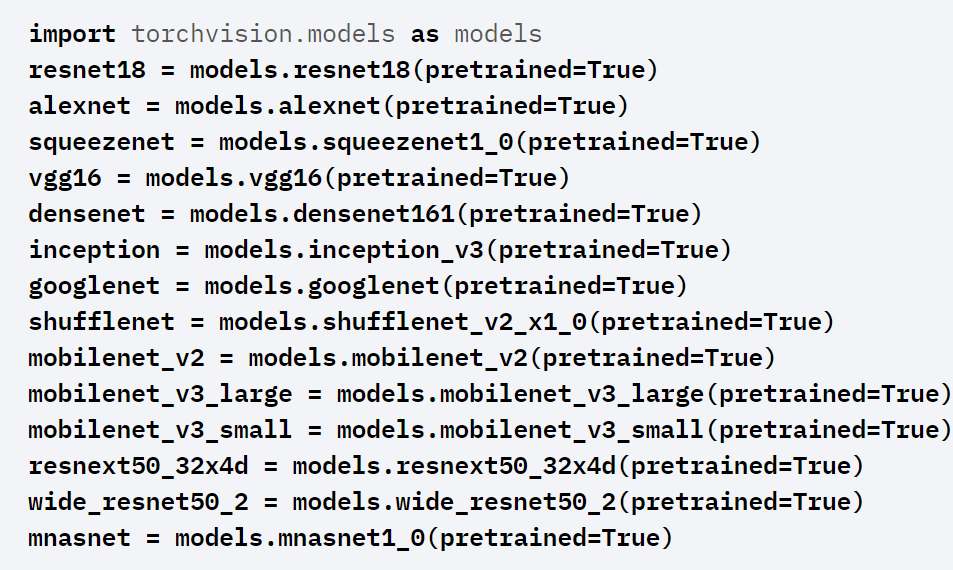

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [17]:
if torch.cuda.is_available():
  Device=torch.device('cuda')
else:
  Device=torch.device('cpu')

print('Using Pytorch version: ', torch.__version__, 'Device: ', Device)

Using Pytorch version:  1.9.0+cu102 Device:  cuda


In [82]:
train_transforms=transforms.Compose([
                                     transforms.Resize((28,28)),
                                     transforms.ToTensor()
])

val_transforms=transforms.Compose([
                                     transforms.Resize((28,28)),
                                     transforms.ToTensor()
])

In [83]:
train_dataset=datasets.ImageFolder(
    '/content/root_dir/train_dir', transform=train_transforms) 

val_dataset=datasets.ImageFolder(
    '/content/root_dir/test_dir', transform=val_transforms)

In [84]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=32,
                                         shuffle=True)
val_loader=torch.utils.data.DataLoader(dataset=val_dataset,
                                       batch_size=32,
                                       shuffle=False)

In [85]:
for (x_train, y_train) in train_loader:
    print('x_train: ', x_train.size(), 'type: ', x_train.type())
    print('y_train: ', y_train.size(), 'type: ', y_train.type())
    break

x_train:  torch.Size([32, 3, 28, 28]) type:  torch.FloatTensor
y_train:  torch.Size([32]) type:  torch.LongTensor


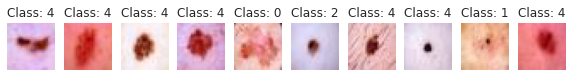

In [86]:
plt.figure(figsize=(10*1, 1))

for i in range(10):
  plt.subplot(1,10,i+1)
  plt.axis('off')
  plt.imshow(np.transpose(x_train[i], (1,2,0)))
  plt.title('Class: '+str(y_train[i].item()))

In [18]:
def train(model, train_loader, optimizier, log_interval):
  model.train()
  for batch_idx, (image, label) in enumerate(train_loader):
    image=image.to(Device)
    label=label.to(Device)
    optimizer.zero_grad()
    output=model(image)
    loss=critertion(output, label)
    loss.backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print(print("Train Epoch: {} [{}/{}({:.0f}%)] \t Train Loss: {:.6f}".format(Epoch, batch_idx*len(image), len(train_loader.dataset), 100.*batch_idx/len(train_loader), loss.item())))

In [19]:
def evaluate(model, test_loader):
  model.eval()
  test_loss=0
  correct=0
  with torch.no_grad():
    for image, label in test_loader:
      image=image.to(Device)
      label=label.to(Device)
      output=model(image)
      test_loss += critertion(output, label).item()
      prediction=output.max(1, keepdim=True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy=100.*correct/len(test_loader.dataset)
    return test_loss, test_accuracy

ResNet18
--

In [20]:
from torchsummary import summary

In [21]:
import torchvision.models as models

In [ ]:
model=models.resnet18(pretrained=True)

In [ ]:
model=model.to(Device)

In [ ]:
optimizer=torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
critertion=nn.CrossEntropyLoss()

In [ ]:
summary(model, input_size=(3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 14, 14]           9,408
       BatchNorm2d-2           [-1, 64, 14, 14]             128
              ReLU-3           [-1, 64, 14, 14]               0
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5             [-1, 64, 7, 7]          36,864
       BatchNorm2d-6             [-1, 64, 7, 7]             128
              ReLU-7             [-1, 64, 7, 7]               0
            Conv2d-8             [-1, 64, 7, 7]          36,864
       BatchNorm2d-9             [-1, 64, 7, 7]             128
             ReLU-10             [-1, 64, 7, 7]               0
       BasicBlock-11             [-1, 64, 7, 7]               0
           Conv2d-12             [-1, 64, 7, 7]          36,864
      BatchNorm2d-13             [-1, 64, 7, 7]             128
             ReLU-14             [-1, 6

In [ ]:
Epochs=10

for Epoch in tqdm(range(1, Epochs+1)):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy=evaluate(model, val_loader)
  print("\n [EPOCH: {}], \t Test Loss: {:.4f}, \t Test Accuracy: {:.2f} \n".format(Epoch, test_loss, test_accuracy))

  0%|          | 0/10 [00:00<?, ?it/s]

Train Epoch: 1 [0/8010(0%)] 	 Train Loss: 0.908413
None
Train Epoch: 1 [6400/8010(80%)] 	 Train Loss: 0.578701
None


 10%|█         | 1/10 [00:25<03:53, 25.95s/it]


 [EPOCH: 1], 	 Test Loss: 0.0246, 	 Test Accuracy: 73.07 

Train Epoch: 2 [0/8010(0%)] 	 Train Loss: 0.513646
None
Train Epoch: 2 [6400/8010(80%)] 	 Train Loss: 0.919256
None


 20%|██        | 2/10 [00:51<03:27, 25.92s/it]


 [EPOCH: 2], 	 Test Loss: 0.0246, 	 Test Accuracy: 73.22 

Train Epoch: 3 [0/8010(0%)] 	 Train Loss: 0.485738
None
Train Epoch: 3 [6400/8010(80%)] 	 Train Loss: 0.645050
None


 30%|███       | 3/10 [01:17<03:01, 25.89s/it]


 [EPOCH: 3], 	 Test Loss: 0.0249, 	 Test Accuracy: 72.17 

Train Epoch: 4 [0/8010(0%)] 	 Train Loss: 0.479170
None
Train Epoch: 4 [6400/8010(80%)] 	 Train Loss: 0.326085
None


 40%|████      | 4/10 [01:43<02:35, 25.89s/it]


 [EPOCH: 4], 	 Test Loss: 0.0255, 	 Test Accuracy: 72.62 

Train Epoch: 5 [0/8010(0%)] 	 Train Loss: 0.546817
None
Train Epoch: 5 [6400/8010(80%)] 	 Train Loss: 0.445811
None


 50%|█████     | 5/10 [02:09<02:09, 25.87s/it]


 [EPOCH: 5], 	 Test Loss: 0.0266, 	 Test Accuracy: 73.12 

Train Epoch: 6 [0/8010(0%)] 	 Train Loss: 0.312017
None
Train Epoch: 6 [6400/8010(80%)] 	 Train Loss: 0.364876
None


 60%|██████    | 6/10 [02:35<01:43, 25.87s/it]


 [EPOCH: 6], 	 Test Loss: 0.0270, 	 Test Accuracy: 72.42 

Train Epoch: 7 [0/8010(0%)] 	 Train Loss: 0.239979
None
Train Epoch: 7 [6400/8010(80%)] 	 Train Loss: 0.377055
None


 70%|███████   | 7/10 [03:01<01:17, 25.88s/it]


 [EPOCH: 7], 	 Test Loss: 0.0280, 	 Test Accuracy: 72.77 

Train Epoch: 8 [0/8010(0%)] 	 Train Loss: 0.365648
None
Train Epoch: 8 [6400/8010(80%)] 	 Train Loss: 0.319754
None


 80%|████████  | 8/10 [03:27<00:51, 25.87s/it]


 [EPOCH: 8], 	 Test Loss: 0.0283, 	 Test Accuracy: 72.97 

Train Epoch: 9 [0/8010(0%)] 	 Train Loss: 0.179997
None
Train Epoch: 9 [6400/8010(80%)] 	 Train Loss: 0.503320
None


 90%|█████████ | 9/10 [03:52<00:25, 25.88s/it]


 [EPOCH: 9], 	 Test Loss: 0.0302, 	 Test Accuracy: 73.57 

Train Epoch: 10 [0/8010(0%)] 	 Train Loss: 0.482714
None
Train Epoch: 10 [6400/8010(80%)] 	 Train Loss: 0.194364
None


100%|██████████| 10/10 [04:18<00:00, 25.89s/it]


 [EPOCH: 10], 	 Test Loss: 0.0310, 	 Test Accuracy: 73.82 



- Last Test Accuracy(10th): 73.82

Googlenet
--

In [ ]:
model=models.googlenet(pretrained=True) 
model=model.to(Device)
optimizer=torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
critertion=nn.CrossEntropyLoss()

In [ ]:
summary(model, input_size=(3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 14, 14]           9,408
       BatchNorm2d-2           [-1, 64, 14, 14]             128
       BasicConv2d-3           [-1, 64, 14, 14]               0
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5             [-1, 64, 7, 7]           4,096
       BatchNorm2d-6             [-1, 64, 7, 7]             128
       BasicConv2d-7             [-1, 64, 7, 7]               0
            Conv2d-8            [-1, 192, 7, 7]         110,592
       BatchNorm2d-9            [-1, 192, 7, 7]             384
      BasicConv2d-10            [-1, 192, 7, 7]               0
        MaxPool2d-11            [-1, 192, 3, 3]               0
           Conv2d-12             [-1, 64, 3, 3]          12,288
      BatchNorm2d-13             [-1, 64, 3, 3]             128
      BasicConv2d-14             [-1, 6

In [ ]:
Epochs=10

for Epoch in tqdm(range(1, Epochs+1)):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy=evaluate(model, val_loader)
  print("\n [EPOCH: {}], \t Test Loss: {:.4f}, \t Test Accuracy: {:.2f} \n".format(Epoch, test_loss, test_accuracy))

  0%|          | 0/10 [00:00<?, ?it/s]

Train Epoch: 1 [0/8010(0%)] 	 Train Loss: 8.434875
None
Train Epoch: 1 [6400/8010(80%)] 	 Train Loss: 2.388240
None


 10%|█         | 1/10 [00:17<02:40, 17.85s/it]


 [EPOCH: 1], 	 Test Loss: 0.0592, 	 Test Accuracy: 66.78 

Train Epoch: 2 [0/8010(0%)] 	 Train Loss: 1.218418
None
Train Epoch: 2 [6400/8010(80%)] 	 Train Loss: 1.512281
None


 20%|██        | 2/10 [00:35<02:21, 17.73s/it]


 [EPOCH: 2], 	 Test Loss: 0.0382, 	 Test Accuracy: 67.63 

Train Epoch: 3 [0/8010(0%)] 	 Train Loss: 1.658365
None
Train Epoch: 3 [6400/8010(80%)] 	 Train Loss: 1.326982
None


 30%|███       | 3/10 [00:53<02:04, 17.75s/it]


 [EPOCH: 3], 	 Test Loss: 0.0343, 	 Test Accuracy: 68.33 

Train Epoch: 4 [0/8010(0%)] 	 Train Loss: 1.687322
None
Train Epoch: 4 [6400/8010(80%)] 	 Train Loss: 0.700963
None


 40%|████      | 4/10 [01:10<01:46, 17.71s/it]


 [EPOCH: 4], 	 Test Loss: 0.0324, 	 Test Accuracy: 68.53 

Train Epoch: 5 [0/8010(0%)] 	 Train Loss: 1.296557
None
Train Epoch: 5 [6400/8010(80%)] 	 Train Loss: 0.589915
None


 50%|█████     | 5/10 [01:28<01:28, 17.71s/it]


 [EPOCH: 5], 	 Test Loss: 0.0316, 	 Test Accuracy: 68.53 

Train Epoch: 6 [0/8010(0%)] 	 Train Loss: 0.726235
None
Train Epoch: 6 [6400/8010(80%)] 	 Train Loss: 1.037563
None


 60%|██████    | 6/10 [01:46<01:10, 17.70s/it]


 [EPOCH: 6], 	 Test Loss: 0.0286, 	 Test Accuracy: 69.83 

Train Epoch: 7 [0/8010(0%)] 	 Train Loss: 0.588745
None
Train Epoch: 7 [6400/8010(80%)] 	 Train Loss: 0.883330
None


 70%|███████   | 7/10 [02:03<00:53, 17.69s/it]


 [EPOCH: 7], 	 Test Loss: 0.0285, 	 Test Accuracy: 70.52 

Train Epoch: 8 [0/8010(0%)] 	 Train Loss: 0.756029
None
Train Epoch: 8 [6400/8010(80%)] 	 Train Loss: 0.651482
None


 80%|████████  | 8/10 [02:21<00:35, 17.70s/it]


 [EPOCH: 8], 	 Test Loss: 0.0277, 	 Test Accuracy: 69.88 

Train Epoch: 9 [0/8010(0%)] 	 Train Loss: 0.657471
None
Train Epoch: 9 [6400/8010(80%)] 	 Train Loss: 1.140641
None


 90%|█████████ | 9/10 [02:39<00:17, 17.70s/it]


 [EPOCH: 9], 	 Test Loss: 0.0272, 	 Test Accuracy: 69.48 

Train Epoch: 10 [0/8010(0%)] 	 Train Loss: 0.815031
None
Train Epoch: 10 [6400/8010(80%)] 	 Train Loss: 0.800655
None


100%|██████████| 10/10 [02:56<00:00, 17.70s/it]


 [EPOCH: 10], 	 Test Loss: 0.0265, 	 Test Accuracy: 71.07 



- Last Test Accuracy(10th): 71.07

Resnet34
--

In [ ]:
model=models.resnet34(pretrained=True) 
model=model.to(Device)
optimizer=torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
critertion=nn.CrossEntropyLoss()

In [ ]:
summary(model, input_size=(3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 14, 14]           9,408
       BatchNorm2d-2           [-1, 64, 14, 14]             128
              ReLU-3           [-1, 64, 14, 14]               0
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5             [-1, 64, 7, 7]          36,864
       BatchNorm2d-6             [-1, 64, 7, 7]             128
              ReLU-7             [-1, 64, 7, 7]               0
            Conv2d-8             [-1, 64, 7, 7]          36,864
       BatchNorm2d-9             [-1, 64, 7, 7]             128
             ReLU-10             [-1, 64, 7, 7]               0
       BasicBlock-11             [-1, 64, 7, 7]               0
           Conv2d-12             [-1, 64, 7, 7]          36,864
      BatchNorm2d-13             [-1, 64, 7, 7]             128
             ReLU-14             [-1, 6

In [ ]:
Epochs=10

for Epoch in tqdm(range(1, Epochs+1)):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy=evaluate(model, val_loader)
  print("\n [EPOCH: {}], \t Test Loss: {:.4f}, \t Test Accuracy: {:.2f} \n".format(Epoch, test_loss, test_accuracy))

  0%|          | 0/10 [00:00<?, ?it/s]

Train Epoch: 1 [0/8010(0%)] 	 Train Loss: 13.441272
None
Train Epoch: 1 [6400/8010(80%)] 	 Train Loss: 0.717943
None


 10%|█         | 1/10 [00:46<07:00, 46.68s/it]


 [EPOCH: 1], 	 Test Loss: 0.0298, 	 Test Accuracy: 71.82 

Train Epoch: 2 [0/8010(0%)] 	 Train Loss: 0.950846
None
Train Epoch: 2 [6400/8010(80%)] 	 Train Loss: 1.000829
None


 20%|██        | 2/10 [01:33<06:13, 46.66s/it]


 [EPOCH: 2], 	 Test Loss: 0.0258, 	 Test Accuracy: 72.47 

Train Epoch: 3 [0/8010(0%)] 	 Train Loss: 0.797117
None
Train Epoch: 3 [6400/8010(80%)] 	 Train Loss: 0.524330
None


 30%|███       | 3/10 [02:19<05:26, 46.64s/it]


 [EPOCH: 3], 	 Test Loss: 0.0255, 	 Test Accuracy: 74.06 

Train Epoch: 4 [0/8010(0%)] 	 Train Loss: 0.496459
None
Train Epoch: 4 [6400/8010(80%)] 	 Train Loss: 0.848744
None


 40%|████      | 4/10 [03:06<04:39, 46.64s/it]


 [EPOCH: 4], 	 Test Loss: 0.0267, 	 Test Accuracy: 72.72 

Train Epoch: 5 [0/8010(0%)] 	 Train Loss: 0.841396
None
Train Epoch: 5 [6400/8010(80%)] 	 Train Loss: 0.449158
None


 50%|█████     | 5/10 [03:53<03:53, 46.65s/it]


 [EPOCH: 5], 	 Test Loss: 0.0246, 	 Test Accuracy: 73.52 

Train Epoch: 6 [0/8010(0%)] 	 Train Loss: 0.522103
None
Train Epoch: 6 [6400/8010(80%)] 	 Train Loss: 0.428483
None


 60%|██████    | 6/10 [04:39<03:06, 46.66s/it]


 [EPOCH: 6], 	 Test Loss: 0.0242, 	 Test Accuracy: 74.56 

Train Epoch: 7 [0/8010(0%)] 	 Train Loss: 0.468641
None
Train Epoch: 7 [6400/8010(80%)] 	 Train Loss: 0.590619
None


 70%|███████   | 7/10 [05:26<02:19, 46.65s/it]


 [EPOCH: 7], 	 Test Loss: 0.0264, 	 Test Accuracy: 73.17 

Train Epoch: 8 [0/8010(0%)] 	 Train Loss: 0.572508
None
Train Epoch: 8 [6400/8010(80%)] 	 Train Loss: 0.662061
None


 80%|████████  | 8/10 [06:13<01:33, 46.66s/it]


 [EPOCH: 8], 	 Test Loss: 0.0285, 	 Test Accuracy: 74.01 

Train Epoch: 9 [0/8010(0%)] 	 Train Loss: 0.264821
None
Train Epoch: 9 [6400/8010(80%)] 	 Train Loss: 0.558749
None


 90%|█████████ | 9/10 [06:59<00:46, 46.64s/it]


 [EPOCH: 9], 	 Test Loss: 0.0266, 	 Test Accuracy: 74.71 

Train Epoch: 10 [0/8010(0%)] 	 Train Loss: 0.362357
None
Train Epoch: 10 [6400/8010(80%)] 	 Train Loss: 0.433251
None


100%|██████████| 10/10 [07:46<00:00, 46.65s/it]


 [EPOCH: 10], 	 Test Loss: 0.0280, 	 Test Accuracy: 73.17 



- Last Test Accuracy(10th):  73.17

ResNet 50
--

In [ ]:
model=models.resnet50(pretrained=True) 
model=model.to(Device)
optimizer=torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
critertion=nn.CrossEntropyLoss()

In [ ]:
summary(model, input_size=(3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 14, 14]           9,408
       BatchNorm2d-2           [-1, 64, 14, 14]             128
              ReLU-3           [-1, 64, 14, 14]               0
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5             [-1, 64, 7, 7]           4,096
       BatchNorm2d-6             [-1, 64, 7, 7]             128
              ReLU-7             [-1, 64, 7, 7]               0
            Conv2d-8             [-1, 64, 7, 7]          36,864
       BatchNorm2d-9             [-1, 64, 7, 7]             128
             ReLU-10             [-1, 64, 7, 7]               0
           Conv2d-11            [-1, 256, 7, 7]          16,384
      BatchNorm2d-12            [-1, 256, 7, 7]             512
           Conv2d-13            [-1, 256, 7, 7]          16,384
      BatchNorm2d-14            [-1, 25

In [ ]:
Epochs=10

for Epoch in tqdm(range(1, Epochs+1)):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy=evaluate(model, val_loader)
  print("\n [EPOCH: {}], \t Test Loss: {:.4f}, \t Test Accuracy: {:.2f} \n".format(Epoch, test_loss, test_accuracy))

  0%|          | 0/10 [00:00<?, ?it/s]

Train Epoch: 1 [0/8010(0%)] 	 Train Loss: 13.361860
None
Train Epoch: 1 [6400/8010(80%)] 	 Train Loss: 1.126591
None


 10%|█         | 1/10 [00:39<05:58, 39.87s/it]


 [EPOCH: 1], 	 Test Loss: 0.0285, 	 Test Accuracy: 69.98 

Train Epoch: 2 [0/8010(0%)] 	 Train Loss: 1.096230
None
Train Epoch: 2 [6400/8010(80%)] 	 Train Loss: 0.600625
None


 20%|██        | 2/10 [01:19<05:19, 39.92s/it]


 [EPOCH: 2], 	 Test Loss: 0.0253, 	 Test Accuracy: 71.62 

Train Epoch: 3 [0/8010(0%)] 	 Train Loss: 0.570826
None
Train Epoch: 3 [6400/8010(80%)] 	 Train Loss: 0.613777
None


 30%|███       | 3/10 [01:59<04:39, 39.92s/it]


 [EPOCH: 3], 	 Test Loss: 0.0237, 	 Test Accuracy: 72.97 

Train Epoch: 4 [0/8010(0%)] 	 Train Loss: 0.467330
None
Train Epoch: 4 [6400/8010(80%)] 	 Train Loss: 0.470535
None


 40%|████      | 4/10 [02:39<03:58, 39.76s/it]


 [EPOCH: 4], 	 Test Loss: 0.0235, 	 Test Accuracy: 73.62 

Train Epoch: 5 [0/8010(0%)] 	 Train Loss: 0.852484
None
Train Epoch: 5 [6400/8010(80%)] 	 Train Loss: 0.589105
None


 50%|█████     | 5/10 [03:19<03:18, 39.76s/it]


 [EPOCH: 5], 	 Test Loss: 0.0236, 	 Test Accuracy: 74.01 

Train Epoch: 6 [0/8010(0%)] 	 Train Loss: 0.797496
None
Train Epoch: 6 [6400/8010(80%)] 	 Train Loss: 0.597235
None


 60%|██████    | 6/10 [03:59<02:39, 39.84s/it]


 [EPOCH: 6], 	 Test Loss: 0.0233, 	 Test Accuracy: 74.46 

Train Epoch: 7 [0/8010(0%)] 	 Train Loss: 0.548165
None
Train Epoch: 7 [6400/8010(80%)] 	 Train Loss: 0.459974
None


 70%|███████   | 7/10 [04:38<01:59, 39.87s/it]


 [EPOCH: 7], 	 Test Loss: 0.0246, 	 Test Accuracy: 74.21 

Train Epoch: 8 [0/8010(0%)] 	 Train Loss: 0.135062
None
Train Epoch: 8 [6400/8010(80%)] 	 Train Loss: 0.313802
None


 80%|████████  | 8/10 [05:18<01:19, 39.78s/it]


 [EPOCH: 8], 	 Test Loss: 0.0266, 	 Test Accuracy: 73.77 

Train Epoch: 9 [0/8010(0%)] 	 Train Loss: 0.288119
None
Train Epoch: 9 [6400/8010(80%)] 	 Train Loss: 0.686293
None


 90%|█████████ | 9/10 [05:58<00:39, 39.80s/it]


 [EPOCH: 9], 	 Test Loss: 0.0267, 	 Test Accuracy: 73.82 

Train Epoch: 10 [0/8010(0%)] 	 Train Loss: 0.251583
None
Train Epoch: 10 [6400/8010(80%)] 	 Train Loss: 0.377627
None


100%|██████████| 10/10 [06:38<00:00, 39.83s/it]


 [EPOCH: 10], 	 Test Loss: 0.0284, 	 Test Accuracy: 74.31 



- Last Test Accuracy(10th): 74.31

ResNet 152
--

In [ ]:
model=models.resnet152(pretrained=True) 
model=model.to(Device)
optimizer=torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
critertion=nn.CrossEntropyLoss()

In [ ]:
summary(model, input_size=(3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 14, 14]           9,408
       BatchNorm2d-2           [-1, 64, 14, 14]             128
              ReLU-3           [-1, 64, 14, 14]               0
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5             [-1, 64, 7, 7]           4,096
       BatchNorm2d-6             [-1, 64, 7, 7]             128
              ReLU-7             [-1, 64, 7, 7]               0
            Conv2d-8             [-1, 64, 7, 7]          36,864
       BatchNorm2d-9             [-1, 64, 7, 7]             128
             ReLU-10             [-1, 64, 7, 7]               0
           Conv2d-11            [-1, 256, 7, 7]          16,384
      BatchNorm2d-12            [-1, 256, 7, 7]             512
           Conv2d-13            [-1, 256, 7, 7]          16,384
      BatchNorm2d-14            [-1, 25

In [ ]:
Epochs=30

for Epoch in tqdm(range(1, Epochs+1)):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy=evaluate(model, val_loader)
  print("\n [EPOCH: {}], \t Test Loss: {:.4f}, \t Test Accuracy: {:.2f} \n".format(Epoch, test_loss, test_accuracy))

  0%|          | 0/30 [00:00<?, ?it/s]

Train Epoch: 1 [0/8010(0%)] 	 Train Loss: 12.878417
None
Train Epoch: 1 [6400/8010(80%)] 	 Train Loss: 0.646455
None


  3%|▎         | 1/30 [01:36<46:44, 96.69s/it]


 [EPOCH: 1], 	 Test Loss: 0.0275, 	 Test Accuracy: 71.27 

Train Epoch: 2 [0/8010(0%)] 	 Train Loss: 0.922523
None
Train Epoch: 2 [6400/8010(80%)] 	 Train Loss: 0.819548
None


  7%|▋         | 2/30 [03:13<45:09, 96.76s/it]


 [EPOCH: 2], 	 Test Loss: 0.0262, 	 Test Accuracy: 71.02 

Train Epoch: 3 [0/8010(0%)] 	 Train Loss: 0.671450
None
Train Epoch: 3 [6400/8010(80%)] 	 Train Loss: 0.530532
None


 10%|█         | 3/30 [04:50<43:34, 96.82s/it]


 [EPOCH: 3], 	 Test Loss: 0.0259, 	 Test Accuracy: 72.62 

Train Epoch: 4 [0/8010(0%)] 	 Train Loss: 0.439301
None
Train Epoch: 4 [6400/8010(80%)] 	 Train Loss: 0.674439
None


 13%|█▎        | 4/30 [06:27<41:58, 96.86s/it]


 [EPOCH: 4], 	 Test Loss: 0.0244, 	 Test Accuracy: 73.42 

Train Epoch: 5 [0/8010(0%)] 	 Train Loss: 0.563274
None
Train Epoch: 5 [6400/8010(80%)] 	 Train Loss: 0.431964
None


 17%|█▋        | 5/30 [08:03<40:18, 96.74s/it]


 [EPOCH: 5], 	 Test Loss: 0.0256, 	 Test Accuracy: 73.37 

Train Epoch: 6 [0/8010(0%)] 	 Train Loss: 0.570342
None
Train Epoch: 6 [6400/8010(80%)] 	 Train Loss: 0.598854
None


 20%|██        | 6/30 [09:40<38:42, 96.77s/it]


 [EPOCH: 6], 	 Test Loss: 0.0235, 	 Test Accuracy: 73.47 

Train Epoch: 7 [0/8010(0%)] 	 Train Loss: 0.514951
None
Train Epoch: 7 [6400/8010(80%)] 	 Train Loss: 0.511372
None


 23%|██▎       | 7/30 [11:17<37:06, 96.80s/it]


 [EPOCH: 7], 	 Test Loss: 0.0255, 	 Test Accuracy: 73.12 

Train Epoch: 8 [0/8010(0%)] 	 Train Loss: 0.365059
None
Train Epoch: 8 [6400/8010(80%)] 	 Train Loss: 0.472044
None


 27%|██▋       | 8/30 [12:54<35:30, 96.83s/it]


 [EPOCH: 8], 	 Test Loss: 0.0301, 	 Test Accuracy: 74.61 

Train Epoch: 9 [0/8010(0%)] 	 Train Loss: 0.468938
None
Train Epoch: 9 [6400/8010(80%)] 	 Train Loss: 0.434874
None


 30%|███       | 9/30 [14:30<33:51, 96.75s/it]


 [EPOCH: 9], 	 Test Loss: 0.0246, 	 Test Accuracy: 74.36 

Train Epoch: 10 [0/8010(0%)] 	 Train Loss: 0.370847
None
Train Epoch: 10 [6400/8010(80%)] 	 Train Loss: 0.726757
None


 33%|███▎      | 10/30 [16:07<32:14, 96.75s/it]


 [EPOCH: 10], 	 Test Loss: 0.0246, 	 Test Accuracy: 73.62 

Train Epoch: 11 [0/8010(0%)] 	 Train Loss: 0.642902
None
Train Epoch: 11 [6400/8010(80%)] 	 Train Loss: 0.874573
None


 37%|███▋      | 11/30 [17:44<30:39, 96.82s/it]


 [EPOCH: 11], 	 Test Loss: 0.0243, 	 Test Accuracy: 72.72 

Train Epoch: 12 [0/8010(0%)] 	 Train Loss: 0.483262
None
Train Epoch: 12 [6400/8010(80%)] 	 Train Loss: 0.312785
None


 40%|████      | 12/30 [19:21<29:03, 96.84s/it]


 [EPOCH: 12], 	 Test Loss: 0.0235, 	 Test Accuracy: 74.41 

Train Epoch: 13 [0/8010(0%)] 	 Train Loss: 0.376311
None
Train Epoch: 13 [6400/8010(80%)] 	 Train Loss: 0.429076
None


 43%|████▎     | 13/30 [20:58<27:24, 96.74s/it]


 [EPOCH: 13], 	 Test Loss: 0.0251, 	 Test Accuracy: 74.56 

Train Epoch: 14 [0/8010(0%)] 	 Train Loss: 0.263923
None
Train Epoch: 14 [6400/8010(80%)] 	 Train Loss: 0.084529
None


 47%|████▋     | 14/30 [22:34<25:48, 96.76s/it]


 [EPOCH: 14], 	 Test Loss: 0.0260, 	 Test Accuracy: 74.01 

Train Epoch: 15 [0/8010(0%)] 	 Train Loss: 0.289417
None
Train Epoch: 15 [6400/8010(80%)] 	 Train Loss: 0.275935
None


 50%|█████     | 15/30 [24:11<24:12, 96.80s/it]


 [EPOCH: 15], 	 Test Loss: 0.0283, 	 Test Accuracy: 73.32 

Train Epoch: 16 [0/8010(0%)] 	 Train Loss: 0.179018
None
Train Epoch: 16 [6400/8010(80%)] 	 Train Loss: 0.283251
None


 53%|█████▎    | 16/30 [25:48<22:35, 96.84s/it]


 [EPOCH: 16], 	 Test Loss: 0.0289, 	 Test Accuracy: 75.16 

Train Epoch: 17 [0/8010(0%)] 	 Train Loss: 0.070845
None
Train Epoch: 17 [6400/8010(80%)] 	 Train Loss: 0.412157
None


 57%|█████▋    | 17/30 [27:25<20:57, 96.73s/it]


 [EPOCH: 17], 	 Test Loss: 0.0294, 	 Test Accuracy: 74.41 

Train Epoch: 18 [0/8010(0%)] 	 Train Loss: 0.144816
None
Train Epoch: 18 [6400/8010(80%)] 	 Train Loss: 0.551309
None


 60%|██████    | 18/30 [29:02<19:21, 96.75s/it]


 [EPOCH: 18], 	 Test Loss: 0.0313, 	 Test Accuracy: 75.31 

Train Epoch: 19 [0/8010(0%)] 	 Train Loss: 0.424503
None
Train Epoch: 19 [6400/8010(80%)] 	 Train Loss: 0.338655
None


 63%|██████▎   | 19/30 [30:38<17:44, 96.81s/it]


 [EPOCH: 19], 	 Test Loss: 0.0324, 	 Test Accuracy: 74.41 

Train Epoch: 20 [0/8010(0%)] 	 Train Loss: 0.291033
None
Train Epoch: 20 [6400/8010(80%)] 	 Train Loss: 0.384635
None


 67%|██████▋   | 20/30 [32:15<16:08, 96.81s/it]


 [EPOCH: 20], 	 Test Loss: 0.0296, 	 Test Accuracy: 73.82 

Train Epoch: 21 [0/8010(0%)] 	 Train Loss: 0.319055
None
Train Epoch: 21 [6400/8010(80%)] 	 Train Loss: 0.191044
None


 70%|███████   | 21/30 [33:52<14:30, 96.72s/it]


 [EPOCH: 21], 	 Test Loss: 0.0289, 	 Test Accuracy: 74.11 

Train Epoch: 22 [0/8010(0%)] 	 Train Loss: 0.160430
None
Train Epoch: 22 [6400/8010(80%)] 	 Train Loss: 0.129005
None


 73%|███████▎  | 22/30 [35:29<12:53, 96.73s/it]


 [EPOCH: 22], 	 Test Loss: 0.0317, 	 Test Accuracy: 74.81 

Train Epoch: 23 [0/8010(0%)] 	 Train Loss: 0.120394
None
Train Epoch: 23 [6400/8010(80%)] 	 Train Loss: 0.235797
None


 77%|███████▋  | 23/30 [37:05<11:17, 96.77s/it]


 [EPOCH: 23], 	 Test Loss: 0.0333, 	 Test Accuracy: 73.57 

Train Epoch: 24 [0/8010(0%)] 	 Train Loss: 0.112112
None
Train Epoch: 24 [6400/8010(80%)] 	 Train Loss: 0.236878
None


 80%|████████  | 24/30 [38:42<09:40, 96.78s/it]


 [EPOCH: 24], 	 Test Loss: 0.0347, 	 Test Accuracy: 74.16 

Train Epoch: 25 [0/8010(0%)] 	 Train Loss: 0.025903
None
Train Epoch: 25 [6400/8010(80%)] 	 Train Loss: 0.235867
None


 83%|████████▎ | 25/30 [40:19<08:03, 96.70s/it]


 [EPOCH: 25], 	 Test Loss: 0.0291, 	 Test Accuracy: 73.47 

Train Epoch: 26 [0/8010(0%)] 	 Train Loss: 0.284737
None
Train Epoch: 26 [6400/8010(80%)] 	 Train Loss: 0.107083
None


 87%|████████▋ | 26/30 [41:55<06:26, 96.70s/it]


 [EPOCH: 26], 	 Test Loss: 0.0279, 	 Test Accuracy: 75.96 

Train Epoch: 27 [0/8010(0%)] 	 Train Loss: 0.233421
None
Train Epoch: 27 [6400/8010(80%)] 	 Train Loss: 0.237342
None


 90%|█████████ | 27/30 [43:32<04:50, 96.75s/it]


 [EPOCH: 27], 	 Test Loss: 0.0317, 	 Test Accuracy: 74.21 

Train Epoch: 28 [0/8010(0%)] 	 Train Loss: 0.165487
None
Train Epoch: 28 [6400/8010(80%)] 	 Train Loss: 0.203049
None


 93%|█████████▎| 28/30 [45:09<03:13, 96.78s/it]


 [EPOCH: 28], 	 Test Loss: 0.0317, 	 Test Accuracy: 75.06 

Train Epoch: 29 [0/8010(0%)] 	 Train Loss: 0.073016
None
Train Epoch: 29 [6400/8010(80%)] 	 Train Loss: 0.315759
None


 97%|█████████▋| 29/30 [46:46<01:36, 96.73s/it]


 [EPOCH: 29], 	 Test Loss: 0.0301, 	 Test Accuracy: 75.71 

Train Epoch: 30 [0/8010(0%)] 	 Train Loss: 0.232644
None
Train Epoch: 30 [6400/8010(80%)] 	 Train Loss: 0.141692
None


100%|██████████| 30/30 [48:23<00:00, 96.77s/it]


 [EPOCH: 30], 	 Test Loss: 0.0307, 	 Test Accuracy: 76.76 



- Last Test Accuracy(30th): 76.76 

- 10th Test Accuracy: 73.62

# Modeling 2

https://pytorch.org/vision/stable/models.html

**Model**

ImageNet 1-crop error rates(224*224)

홈페이지에 있는 33개의 모델 중에서 Acc@1가 75를 초과하는 모델 모음

12. ResNet-50

- 76.130

13. ResNet-101

- 77.374

14. ResNet-152

- 78.312

18. Densenet-169

- 75.600

19. Densenet-201

- 76.896

20. Densenet-161

- 77.138

21. Inception v3

- 77.294


28. ResNeXt-50-32x4d

- 77.618

29. ResNeXt-101-32x8d

- 79.312

30. Wide ResNet-50-2

- 78.468

31. Wide ResNet-101-2

- 78.848


ResNeXt-101-32x4d
--

In [97]:
model=models.resnext101_32x8d(pretrained=True) 
model=model.to(Device)
optimizer=torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
critertion=nn.CrossEntropyLoss()

In [98]:
summary(model, input_size=(3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 14, 14]           9,408
       BatchNorm2d-2           [-1, 64, 14, 14]             128
              ReLU-3           [-1, 64, 14, 14]               0
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5            [-1, 256, 7, 7]          16,384
       BatchNorm2d-6            [-1, 256, 7, 7]             512
              ReLU-7            [-1, 256, 7, 7]               0
            Conv2d-8            [-1, 256, 7, 7]          18,432
       BatchNorm2d-9            [-1, 256, 7, 7]             512
             ReLU-10            [-1, 256, 7, 7]               0
           Conv2d-11            [-1, 256, 7, 7]          65,536
      BatchNorm2d-12            [-1, 256, 7, 7]             512
           Conv2d-13            [-1, 256, 7, 7]          16,384
      BatchNorm2d-14            [-1, 25

In [99]:
Epochs=10

for Epoch in tqdm(range(1, Epochs+1)):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy=evaluate(model, val_loader)
  print("\n [EPOCH: {}], \t Test Loss: {:.4f}, \t Test Accuracy: {:.2f} \n".format(Epoch, test_loss, test_accuracy))

  0%|          | 0/10 [00:00<?, ?it/s]

Train Epoch: 1 [0/8010(0%)] 	 Train Loss: 7.812689
None
Train Epoch: 1 [6400/8010(80%)] 	 Train Loss: 0.986908
None


 10%|█         | 1/10 [03:08<28:18, 188.69s/it]


 [EPOCH: 1], 	 Test Loss: 0.0289, 	 Test Accuracy: 70.07 

Train Epoch: 2 [0/8010(0%)] 	 Train Loss: 1.020037
None
Train Epoch: 2 [6400/8010(80%)] 	 Train Loss: 0.883425
None


 20%|██        | 2/10 [06:17<25:09, 188.65s/it]


 [EPOCH: 2], 	 Test Loss: 0.0243, 	 Test Accuracy: 73.77 

Train Epoch: 3 [0/8010(0%)] 	 Train Loss: 0.644616
None
Train Epoch: 3 [6400/8010(80%)] 	 Train Loss: 0.595000
None


 30%|███       | 3/10 [09:26<22:01, 188.85s/it]


 [EPOCH: 3], 	 Test Loss: 0.0240, 	 Test Accuracy: 74.36 

Train Epoch: 4 [0/8010(0%)] 	 Train Loss: 0.518560
None
Train Epoch: 4 [6400/8010(80%)] 	 Train Loss: 0.963290
None


 40%|████      | 4/10 [12:35<18:52, 188.80s/it]


 [EPOCH: 4], 	 Test Loss: 0.0250, 	 Test Accuracy: 74.36 

Train Epoch: 5 [0/8010(0%)] 	 Train Loss: 0.359105
None
Train Epoch: 5 [6400/8010(80%)] 	 Train Loss: 0.550306
None


 50%|█████     | 5/10 [15:44<15:44, 188.88s/it]


 [EPOCH: 5], 	 Test Loss: 0.0249, 	 Test Accuracy: 74.66 

Train Epoch: 6 [0/8010(0%)] 	 Train Loss: 0.366659
None
Train Epoch: 6 [6400/8010(80%)] 	 Train Loss: 0.377234
None


 60%|██████    | 6/10 [18:53<12:36, 189.00s/it]


 [EPOCH: 6], 	 Test Loss: 0.0250, 	 Test Accuracy: 75.66 

Train Epoch: 7 [0/8010(0%)] 	 Train Loss: 0.173126
None
Train Epoch: 7 [6400/8010(80%)] 	 Train Loss: 0.301935
None


 70%|███████   | 7/10 [22:02<09:27, 189.07s/it]


 [EPOCH: 7], 	 Test Loss: 0.0265, 	 Test Accuracy: 75.16 

Train Epoch: 8 [0/8010(0%)] 	 Train Loss: 0.254294
None
Train Epoch: 8 [6400/8010(80%)] 	 Train Loss: 0.205519
None


 80%|████████  | 8/10 [25:11<06:18, 189.12s/it]


 [EPOCH: 8], 	 Test Loss: 0.0297, 	 Test Accuracy: 75.16 

Train Epoch: 9 [0/8010(0%)] 	 Train Loss: 0.293157
None
Train Epoch: 9 [6400/8010(80%)] 	 Train Loss: 0.050726
None


 90%|█████████ | 9/10 [28:20<03:09, 189.04s/it]


 [EPOCH: 9], 	 Test Loss: 0.0318, 	 Test Accuracy: 74.36 

Train Epoch: 10 [0/8010(0%)] 	 Train Loss: 0.291654
None
Train Epoch: 10 [6400/8010(80%)] 	 Train Loss: 0.111563
None


100%|██████████| 10/10 [31:29<00:00, 188.90s/it]


 [EPOCH: 10], 	 Test Loss: 0.0319, 	 Test Accuracy: 74.31 



- Last Test Accuracy(10th): 74.31

Data Augmentation
--

In [101]:
len_x_train=0
len_y_train=0

for (x_train, y_train) in train_loader:
    len_x_train=len_x_train+len(x_train)
    len_y_train=len_y_train+len(y_train)

print("x_train's total size", len_x_train)
print("y_train's total size", len_y_train)

x_train's total size 8010
y_train's total size 8010


In [113]:
train_transforms=transforms.Compose([
                                     transforms.Resize((28,28)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

val_transforms=transforms.Compose([
                                     transforms.Resize((28,28)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

- transforms.Compose: 불러오는 이미지 데이터에 전처리 및 Augmentation을 다양하게 적용할 때 이용하는 메서드

- transforms.RandomHorizontalFlip: 해당 이미지를 n% 확률로 좌우 반전

- transforms.ToTensor: ToTensor() 형태로 전환 

- transforms.Normalize: ToTensor() 형태로 전환된 이미지에 대해 또 다른 정규화를 진행하는 것을 의미함. 정규화를 진행할 때는 평균과 표준편차가 필요한데, red, green, blue 순으로 평균을 '0.n'씩 적용하는 것을 의미함. 

In [114]:
train_dataset=datasets.ImageFolder(
    '/content/root_dir/train_dir', transform=train_transforms) 

val_dataset=datasets.ImageFolder(
    '/content/root_dir/test_dir', transform=val_transforms)

In [115]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=32,
                                         shuffle=True)
val_loader=torch.utils.data.DataLoader(dataset=val_dataset,
                                       batch_size=32,
                                       shuffle=False)

In [116]:
len_x_train=0
len_y_train=0

for (x_train, y_train) in train_loader:
    len_x_train=len_x_train+len(x_train)
    len_y_train=len_y_train+len(y_train)

print("x_train's total size", len_x_train)
print("y_train's total size", len_y_train)

x_train's total size 8010
y_train's total size 8010


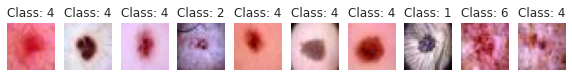

In [105]:
plt.figure(figsize=(10*1, 1))

for i in range(10):
  plt.subplot(1,10,i+1)
  plt.axis('off')
  plt.imshow(np.transpose(x_train[i], (1,2,0)))
  plt.title('Class: '+str(y_train[i].item()))

In [118]:
model=models.resnext101_32x8d(pretrained=True) 
model=model.to(Device)
optimizer=torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
critertion=nn.CrossEntropyLoss()

In [119]:
Epochs=30

for Epoch in tqdm(range(1, Epochs+1)):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy=evaluate(model, val_loader)
  print("\n [EPOCH: {}], \t Test Loss: {:.4f}, \t Test Accuracy: {:.2f} \n".format(Epoch, test_loss, test_accuracy))

  0%|          | 0/30 [00:00<?, ?it/s]

Train Epoch: 1 [0/8010(0%)] 	 Train Loss: 7.844920
None
Train Epoch: 1 [6400/8010(80%)] 	 Train Loss: 0.740028
None


  3%|▎         | 1/30 [03:09<1:31:35, 189.51s/it]


 [EPOCH: 1], 	 Test Loss: 0.0289, 	 Test Accuracy: 72.32 

Train Epoch: 2 [0/8010(0%)] 	 Train Loss: 1.519683
None
Train Epoch: 2 [6400/8010(80%)] 	 Train Loss: 0.756965
None


  7%|▋         | 2/30 [06:19<1:28:27, 189.57s/it]


 [EPOCH: 2], 	 Test Loss: 0.0240, 	 Test Accuracy: 74.01 

Train Epoch: 3 [0/8010(0%)] 	 Train Loss: 0.709191
None
Train Epoch: 3 [6400/8010(80%)] 	 Train Loss: 0.713056
None


 10%|█         | 3/30 [09:28<1:25:17, 189.54s/it]


 [EPOCH: 3], 	 Test Loss: 0.0233, 	 Test Accuracy: 74.16 

Train Epoch: 4 [0/8010(0%)] 	 Train Loss: 0.749726
None
Train Epoch: 4 [6400/8010(80%)] 	 Train Loss: 0.489781
None


 13%|█▎        | 4/30 [12:38<1:22:09, 189.61s/it]


 [EPOCH: 4], 	 Test Loss: 0.0235, 	 Test Accuracy: 75.06 

Train Epoch: 5 [0/8010(0%)] 	 Train Loss: 0.609600
None
Train Epoch: 5 [6400/8010(80%)] 	 Train Loss: 0.352657
None


 17%|█▋        | 5/30 [15:48<1:19:03, 189.72s/it]


 [EPOCH: 5], 	 Test Loss: 0.0239, 	 Test Accuracy: 74.16 

Train Epoch: 6 [0/8010(0%)] 	 Train Loss: 0.444754
None
Train Epoch: 6 [6400/8010(80%)] 	 Train Loss: 0.219779
None


 20%|██        | 6/30 [18:58<1:15:56, 189.86s/it]


 [EPOCH: 6], 	 Test Loss: 0.0245, 	 Test Accuracy: 75.26 

Train Epoch: 7 [0/8010(0%)] 	 Train Loss: 0.544111
None
Train Epoch: 7 [6400/8010(80%)] 	 Train Loss: 0.441469
None


 23%|██▎       | 7/30 [22:08<1:12:47, 189.88s/it]


 [EPOCH: 7], 	 Test Loss: 0.0248, 	 Test Accuracy: 75.16 

Train Epoch: 8 [0/8010(0%)] 	 Train Loss: 0.329835
None
Train Epoch: 8 [6400/8010(80%)] 	 Train Loss: 0.631662
None


 27%|██▋       | 8/30 [25:18<1:09:40, 190.01s/it]


 [EPOCH: 8], 	 Test Loss: 0.0242, 	 Test Accuracy: 75.66 

Train Epoch: 9 [0/8010(0%)] 	 Train Loss: 0.449830
None
Train Epoch: 9 [6400/8010(80%)] 	 Train Loss: 0.406072
None


 30%|███       | 9/30 [28:29<1:06:33, 190.15s/it]


 [EPOCH: 9], 	 Test Loss: 0.0321, 	 Test Accuracy: 72.97 

Train Epoch: 10 [0/8010(0%)] 	 Train Loss: 0.700778
None
Train Epoch: 10 [6400/8010(80%)] 	 Train Loss: 0.393272
None


 33%|███▎      | 10/30 [31:38<1:03:18, 189.94s/it]


 [EPOCH: 10], 	 Test Loss: 0.0242, 	 Test Accuracy: 75.76 

Train Epoch: 11 [0/8010(0%)] 	 Train Loss: 0.531381
None
Train Epoch: 11 [6400/8010(80%)] 	 Train Loss: 0.335987
None


 37%|███▋      | 11/30 [34:48<1:00:09, 189.96s/it]


 [EPOCH: 11], 	 Test Loss: 0.0240, 	 Test Accuracy: 76.76 

Train Epoch: 12 [0/8010(0%)] 	 Train Loss: 0.231299
None
Train Epoch: 12 [6400/8010(80%)] 	 Train Loss: 0.412547
None


 40%|████      | 12/30 [37:58<56:57, 189.89s/it]  


 [EPOCH: 12], 	 Test Loss: 0.0258, 	 Test Accuracy: 75.46 

Train Epoch: 13 [0/8010(0%)] 	 Train Loss: 0.126372
None
Train Epoch: 13 [6400/8010(80%)] 	 Train Loss: 0.552098
None


 43%|████▎     | 13/30 [41:08<53:49, 189.98s/it]


 [EPOCH: 13], 	 Test Loss: 0.0260, 	 Test Accuracy: 75.26 

Train Epoch: 14 [0/8010(0%)] 	 Train Loss: 0.191870
None
Train Epoch: 14 [6400/8010(80%)] 	 Train Loss: 0.122222
None


 47%|████▋     | 14/30 [44:18<50:40, 190.00s/it]


 [EPOCH: 14], 	 Test Loss: 0.0278, 	 Test Accuracy: 76.51 

Train Epoch: 15 [0/8010(0%)] 	 Train Loss: 0.218000
None
Train Epoch: 15 [6400/8010(80%)] 	 Train Loss: 0.380824
None


 50%|█████     | 15/30 [47:25<47:17, 189.19s/it]


 [EPOCH: 15], 	 Test Loss: 0.0286, 	 Test Accuracy: 76.36 

Train Epoch: 16 [0/8010(0%)] 	 Train Loss: 0.121397
None
Train Epoch: 16 [6400/8010(80%)] 	 Train Loss: 0.315958
None


 53%|█████▎    | 16/30 [50:33<44:00, 188.60s/it]


 [EPOCH: 16], 	 Test Loss: 0.0277, 	 Test Accuracy: 75.61 

Train Epoch: 17 [0/8010(0%)] 	 Train Loss: 0.328840
None
Train Epoch: 17 [6400/8010(80%)] 	 Train Loss: 0.302014
None


 57%|█████▋    | 17/30 [53:40<40:47, 188.24s/it]


 [EPOCH: 17], 	 Test Loss: 0.0291, 	 Test Accuracy: 75.61 

Train Epoch: 18 [0/8010(0%)] 	 Train Loss: 0.025254
None
Train Epoch: 18 [6400/8010(80%)] 	 Train Loss: 0.056372
None


 60%|██████    | 18/30 [56:47<37:34, 187.89s/it]


 [EPOCH: 18], 	 Test Loss: 0.0304, 	 Test Accuracy: 75.76 

Train Epoch: 19 [0/8010(0%)] 	 Train Loss: 0.048302
None
Train Epoch: 19 [6400/8010(80%)] 	 Train Loss: 0.245381
None


 63%|██████▎   | 19/30 [59:54<34:23, 187.63s/it]


 [EPOCH: 19], 	 Test Loss: 0.0306, 	 Test Accuracy: 75.86 

Train Epoch: 20 [0/8010(0%)] 	 Train Loss: 0.052423
None
Train Epoch: 20 [6400/8010(80%)] 	 Train Loss: 0.164949
None


 67%|██████▋   | 20/30 [1:03:01<31:14, 187.47s/it]


 [EPOCH: 20], 	 Test Loss: 0.0323, 	 Test Accuracy: 76.61 

Train Epoch: 21 [0/8010(0%)] 	 Train Loss: 0.031109
None
Train Epoch: 21 [6400/8010(80%)] 	 Train Loss: 0.118446
None


 70%|███████   | 21/30 [1:06:08<28:06, 187.35s/it]


 [EPOCH: 21], 	 Test Loss: 0.0321, 	 Test Accuracy: 76.71 

Train Epoch: 22 [0/8010(0%)] 	 Train Loss: 0.106397
None
Train Epoch: 22 [6400/8010(80%)] 	 Train Loss: 0.104421
None


 73%|███████▎  | 22/30 [1:09:16<24:58, 187.35s/it]


 [EPOCH: 22], 	 Test Loss: 0.0316, 	 Test Accuracy: 76.41 

Train Epoch: 23 [0/8010(0%)] 	 Train Loss: 0.020130
None
Train Epoch: 23 [6400/8010(80%)] 	 Train Loss: 0.022246
None


 77%|███████▋  | 23/30 [1:12:22<21:50, 187.20s/it]


 [EPOCH: 23], 	 Test Loss: 0.0326, 	 Test Accuracy: 76.31 

Train Epoch: 24 [0/8010(0%)] 	 Train Loss: 0.269986
None
Train Epoch: 24 [6400/8010(80%)] 	 Train Loss: 0.091070
None


 80%|████████  | 24/30 [1:15:29<18:42, 187.11s/it]


 [EPOCH: 24], 	 Test Loss: 0.0332, 	 Test Accuracy: 75.36 

Train Epoch: 25 [0/8010(0%)] 	 Train Loss: 0.029545
None
Train Epoch: 25 [6400/8010(80%)] 	 Train Loss: 0.072772
None


 83%|████████▎ | 25/30 [1:18:36<15:35, 187.06s/it]


 [EPOCH: 25], 	 Test Loss: 0.0323, 	 Test Accuracy: 76.06 

Train Epoch: 26 [0/8010(0%)] 	 Train Loss: 0.066706
None
Train Epoch: 26 [6400/8010(80%)] 	 Train Loss: 0.138131
None


 87%|████████▋ | 26/30 [1:21:44<12:28, 187.14s/it]


 [EPOCH: 26], 	 Test Loss: 0.0338, 	 Test Accuracy: 76.26 

Train Epoch: 27 [0/8010(0%)] 	 Train Loss: 0.108189
None
Train Epoch: 27 [6400/8010(80%)] 	 Train Loss: 0.025306
None


 90%|█████████ | 27/30 [1:24:50<09:20, 186.96s/it]


 [EPOCH: 27], 	 Test Loss: 0.0337, 	 Test Accuracy: 75.21 

Train Epoch: 28 [0/8010(0%)] 	 Train Loss: 0.102422
None
Train Epoch: 28 [6400/8010(80%)] 	 Train Loss: 0.088055
None


 93%|█████████▎| 28/30 [1:27:57<06:13, 186.84s/it]


 [EPOCH: 28], 	 Test Loss: 0.0334, 	 Test Accuracy: 76.21 

Train Epoch: 29 [0/8010(0%)] 	 Train Loss: 0.016487
None
Train Epoch: 29 [6400/8010(80%)] 	 Train Loss: 0.037048
None


 97%|█████████▋| 29/30 [1:31:03<03:06, 186.75s/it]


 [EPOCH: 29], 	 Test Loss: 0.0351, 	 Test Accuracy: 76.36 

Train Epoch: 30 [0/8010(0%)] 	 Train Loss: 0.061944
None
Train Epoch: 30 [6400/8010(80%)] 	 Train Loss: 0.139675
None


100%|██████████| 30/30 [1:34:10<00:00, 188.36s/it]


 [EPOCH: 30], 	 Test Loss: 0.0343, 	 Test Accuracy: 76.16 



- Last Test Accuracy: 76.16